In [4]:
import numpy as np
import pandas as pd

In [5]:
data1=pd.read_csv('spam.csv',encoding='ISO-8859-1')
data2=pd.read_csv('spam_ham_dataset.csv')

In [6]:
data=pd.concat([data1,data2],ignore_index=True)

In [7]:
data.sample(5)

,label,text,label_num,Unnamed: 3
5495,ham,"Good afternoon, my love ... How goes your day ...",0,NaN
3185,ham,Happy birthday to you....dear.with lots of lov...,0,NaN
8657,ham,"not as rough list\r\ni spoke to sabrae , we ar...",0,NaN
5543,ham,U still havent got urself a jacket ah?,0,NaN
3928,ham,Yes. Nigh you cant aha.,0,NaN


In [8]:
data=data.drop(columns=['Unnamed: 3'])

In [9]:
data=data.drop(columns=['label_num'])

In [10]:
data.shape

(10743, 2)

#### 1.Data Cleaning
#### 2.EDA
#### 3.Text Preprocessing
#### 4.Model Building
#### 5.Evaluation
#### 6.Improvement
#### 7.Website
#### 8.Deployment

### Data Cleaning

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10743 entries, 0 to 10742
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10743 non-null  object
 1   text    10743 non-null  object
dtypes: object(2)
memory usage: 168.0+ KB


In [12]:
data.rename(columns={'label':'target'},inplace=True)

In [13]:
data.sample(5)

,target,text
6761,spam,"^ . pe , nis s ^ ize mat ; ters ! yhvqbvdboevk..."
3791,ham,Love it! I want to flood that pretty pussy wit...
5155,ham,MY NEW YEARS EVE WAS OK. I WENT TO A PARTY WIT...
6621,spam,csgu to launch 13 videos\r\nmultimedia sector ...
6498,spam,re : clement\r\nhassan\r\n


In [14]:
#we change ham->0 , spam=1

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
data['target']=encoder.fit_transform(data['target'])
#It assigns ham->0, spam->1

In [17]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
#Check Missing values
data.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
#Check Duplicate data
data.duplicated().sum()

581

In [20]:
#remove duplicate data
data=data.drop_duplicates(keep='first')
# The keep parameter specifies which duplicate(s) to keep. The default value for keep is 'first', which means that the first occurrence of each duplicate row will be kept.

In [21]:
data.duplicated().sum()

0

In [22]:
data.shape


(10162, 2)

### EDA

In [23]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
data['target'].value_counts()

target
0    8047
1    2115
Name: count, dtype: int64

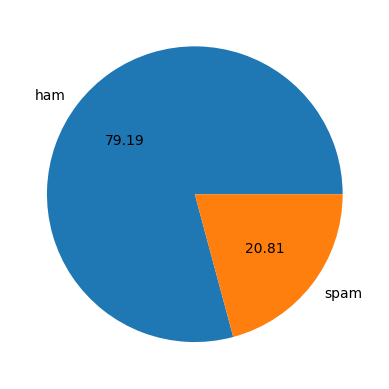

In [25]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [26]:
#data is imbalanced
# ham is much more than spam

In [27]:
#now work on sentence
#no. of characters in the sms
#no. of words in the sms
#no. of sentencess in the sms

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
#no. of characters
data['num_characters']=data['text'].apply(len)

In [31]:
#no. of words
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
#no. of sentences
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,10162.000000,10162.000000,10162.000000
mean,561.185003,123.219051,7.576560
std,1191.436722,261.690557,20.438431
min,2.000000,0.000000,0.000000
25%,55.000000,14.000000,1.000000
50%,142.000000,30.500000,3.000000
75%,531.000000,120.000000,7.000000
max,32249.000000,8861.000000,1204.000000


In [35]:
#ham description
data[data['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,8047.000000,8047.000000,8047.000000
mean,472.161302,109.881944,6.138934
std,1035.124698,246.858480,17.504968
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,104.000000,25.000000,2.000000
75%,425.000000,102.000000,6.000000
max,32249.000000,8861.000000,1204.000000


In [36]:
#spam description
data[data['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2115.000000,2115.000000,2115.000000
mean,899.895981,173.963121,13.046336
std,1612.420211,306.544486,28.350702
min,2.000000,0.000000,0.000000
25%,149.000000,29.000000,3.000000
50%,322.000000,65.000000,5.000000
75%,854.500000,172.000000,13.000000
max,22064.000000,3961.000000,693.000000


In [37]:
#we can analyze spam messages are larger than ham messages

In [38]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

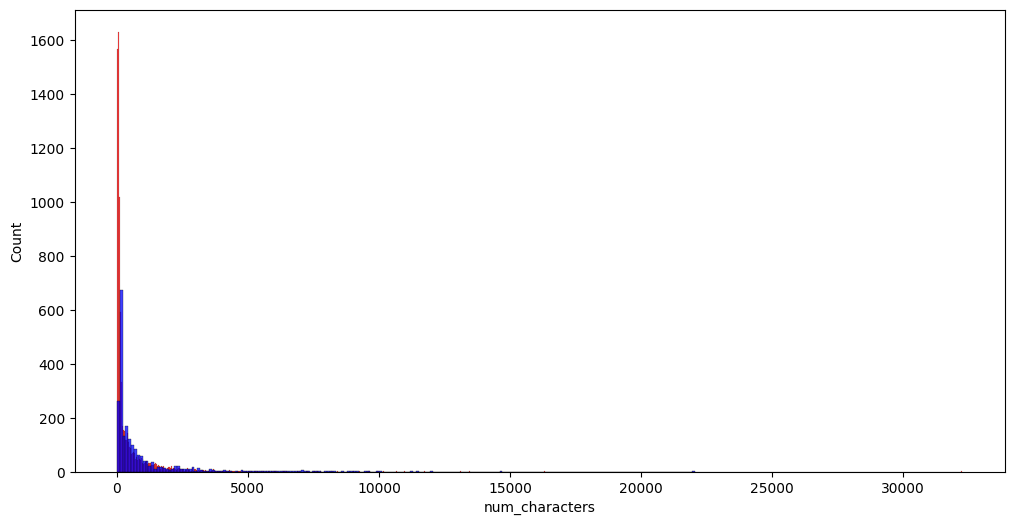

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_characters'],color='red')
sns.histplot(data[data['target']==1]['num_characters'],color='blue')

<Axes: xlabel='num_words', ylabel='Count'>

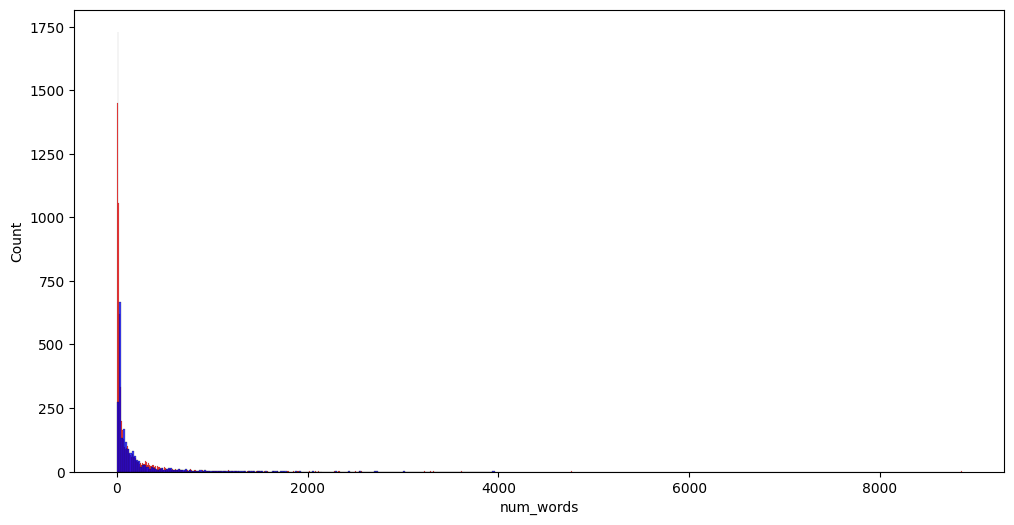

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target']==0]['num_words'],color='red')
sns.histplot(data[data['target']==1]['num_words'],color='blue')

<Axes: xlabel='num_sentences', ylabel='Count'>

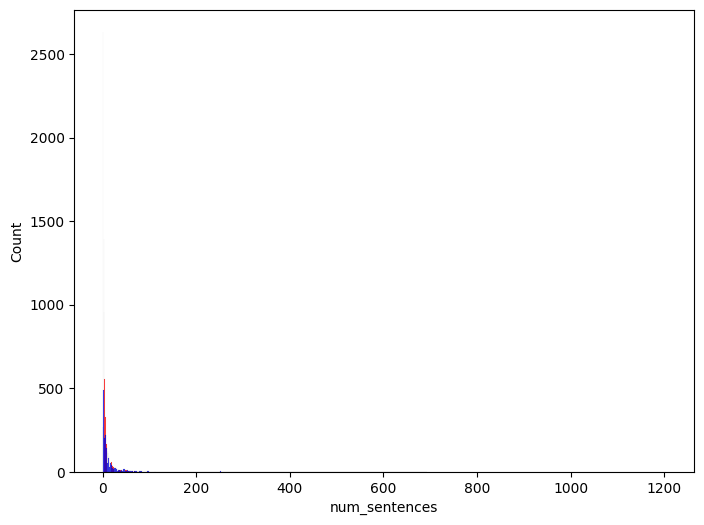

In [41]:
plt.figure(figsize=(8,6))
sns.histplot(data[data['target']==0]['num_sentences'],color='red')
sns.histplot(data[data['target']==1]['num_sentences'],color='blue')

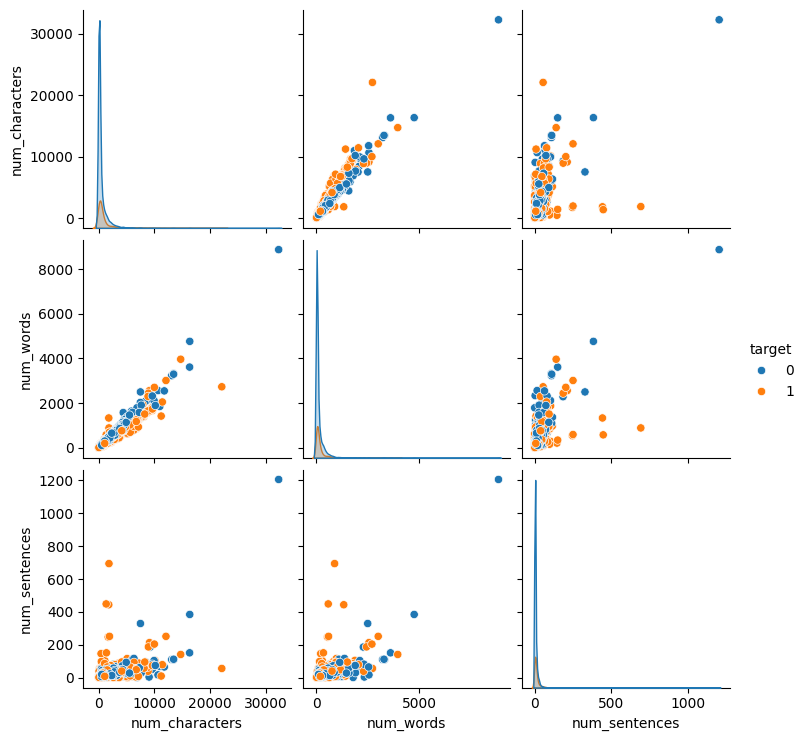

In [42]:
#relation between them
sns.pairplot(data,hue='target')

In [43]:
data[['target','num_characters','num_words','num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.145753,0.099416,0.137209
num_characters,0.145753,1.000000,0.975424,0.666249
num_words,0.099416,0.975424,1.000000,0.730407
num_sentences,0.137209,0.666249,0.730407,1.000000


<Axes: >

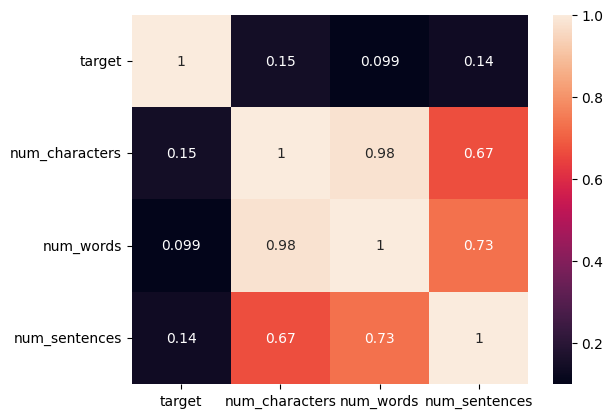

In [44]:
sns.heatmap(data[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

### Data Preprocessing
    Lower Case
    Tokenization
    Removing special Characters
    Removing Stop Words and Punctuation
    Stemming


In [45]:
# #Stop Words
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [49]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(ps.stem(i))
    return " ".join(y)

In [50]:
transform_text(data['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [51]:
data['transformed_text']=data['text'].apply(transform_text)

In [52]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
#create word cloud of ham and spam those words occurence is large it will bigger

In [54]:
# !pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=700,height=700,min_font_size=10,background_color='white')

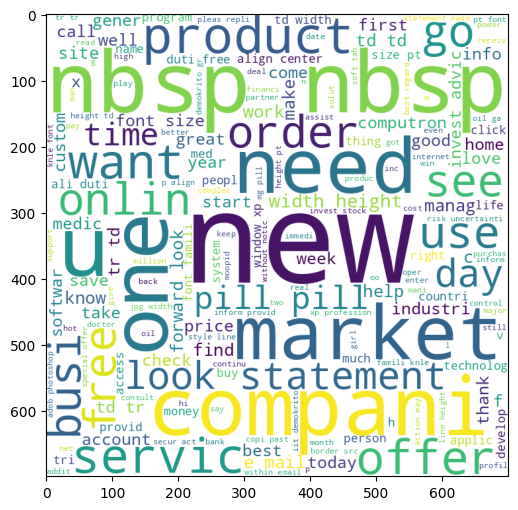

In [55]:
#Spam Cloud
spam_wc=wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

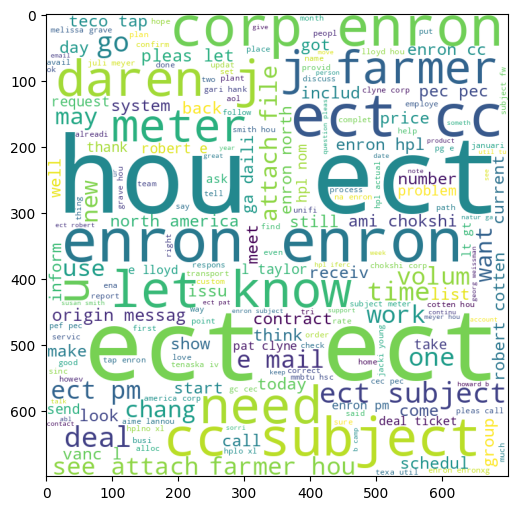

In [56]:
#Ham Cloud
ham_wc=wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [57]:
# top 30 words of ham and spam
spam_corpus=[]
for msg in data[data['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
print(len(spam_corpus))

205069


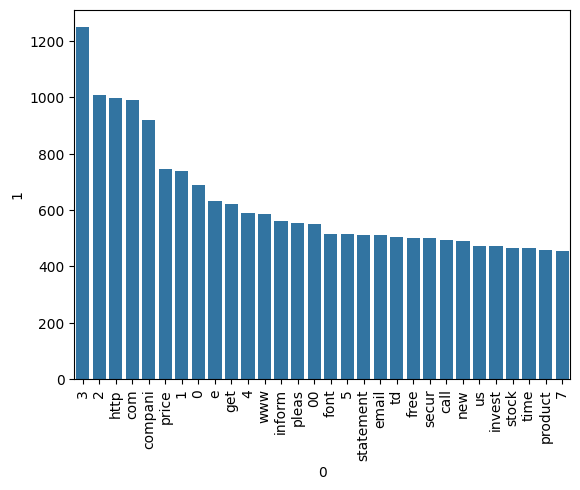

In [58]:
from collections import Counter
x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1]
sns.barplot(x=x,y=y)
plt.xticks(rotation='vertical')
plt.show()

In [59]:
# top 30 words of ham and spam
ham_corpus=[]
for msg in data[data['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
print(len(ham_corpus))

412348


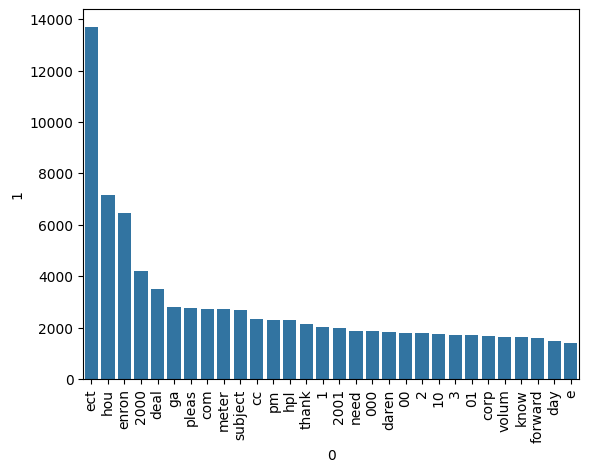

In [60]:
from collections import Counter
x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0]
y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1]
sns.barplot(x=x,y=y)
plt.xticks(rotation='vertical')
plt.show()

### Model Building

In [61]:
#First we will build with Naive baiyes because it works better on textual data, but we also compare with other algorithms

In [62]:
#first we need to vectorize the text

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [64]:
X=cv.fit_transform(data['transformed_text']).toarray()

In [65]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [66]:
X.shape

(10162, 45520)

In [67]:
Y=data['target'].values

In [68]:
Y

array([0, 0, 1, ..., 0, 0, 1])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [73]:
gnb.fit(train_x,train_y)
y_pred1=gnb.predict((test_x))
print(accuracy_score(test_y,y_pred1))
print(confusion_matrix(test_y,y_pred1))
print(precision_score(test_y,y_pred1))

0.9198229217904574
[[1539   85]
 [  78  331]]
0.7956730769230769


In [74]:
mnb.fit(train_x,train_y)
y_pred2=mnb.predict((test_x))
print(accuracy_score(test_y,y_pred2))
print(confusion_matrix(test_y,y_pred2))
print(precision_score(test_y,y_pred2))

0.926709296606001
[[1500  124]
 [  25  384]]
0.7559055118110236


In [75]:
bnb.fit(train_x,train_y)
y_pred3=bnb.predict((test_x))
print(accuracy_score(test_y,y_pred3))
print(confusion_matrix(test_y,y_pred3))
print(precision_score(test_y,y_pred3))

0.8706345302508608
[[1585   39]
 [ 224  185]]
0.8258928571428571


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)

In [77]:
X=tfidf.fit_transform(data['transformed_text']).toarray()
Y=data['target'].values

In [78]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [79]:
# X=np.hstack((X,data['num_characters'].values.reshape(-1,1)))

In [80]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=2)

In [81]:
gnb1=GaussianNB()
mnb1=MultinomialNB()
bnb1=BernoulliNB()

In [82]:
gnb1.fit(train_x,train_y)
y_pred4=gnb1.predict((test_x))
print(accuracy_score(test_y,y_pred4))
print(confusion_matrix(test_y,y_pred4))
print(precision_score(test_y,y_pred4))

0.7309394982784063
[[1099  525]
 [  22  387]]
0.4243421052631579


In [83]:
mnb1.fit(train_x,train_y)
y_pred5=mnb1.predict((test_x))
print(accuracy_score(test_y,y_pred5))
print(confusion_matrix(test_y,y_pred5))
print(precision_score(test_y,y_pred5))

0.9508116084604034
[[1580   44]
 [  56  353]]
0.889168765743073


In [84]:
bnb1.fit(train_x,train_y)
y_pred6=bnb1.predict((test_x))
print(accuracy_score(test_y,y_pred6))
print(confusion_matrix(test_y,y_pred6))
print(precision_score(test_y,y_pred6))

0.8937530742744713
[[1554   70]
 [ 146  263]]
0.7897897897897898


In [85]:
#we use tfidf --> MNB1

In [ ]:
#Let's work we other algorithms

In [86]:
def train_classifier(clf,train_x,train_y,test_x,test_y):
    clf.fit(train_x,train_y)
    y_pred=clf.predict(test_x)
    accuracy=accuracy_score(test_y,y_pred)
    precision=precision_score(test_y,y_pred)

    return accuracy,precision

In [88]:
mnb.fit(train_x,train_y)
y_pred=mnb.predict((test_x))
print(accuracy_score(test_y,y_pred))
print(confusion_matrix(test_y,y_pred))
print(precision_score(test_y,y_pred))

0.9508116084604034
[[1580   44]
 [  56  353]]
0.889168765743073


In [89]:
test='you won a lottery'
transformed_sms = transform_text(test)
vector_input = tfidf.transform([transformed_sms]).toarray()
result = mnb.predict(vector_input)[0]
if result==1:
    print('Spam')
else:
    print('Not Spam')

Spam


In [90]:
import pickle

In [91]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [92]:
pickle.dump(mnb,open('model.pkl','wb'))

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
